In [22]:
import pandas as pd
import scipy as sc
import numpy as np
import h5py
import matplotlib.pylab as plt

In [23]:
#DATOS
data_train= "train_catvnoncat.h5"
train_dataset = h5py.File(data_train, "r")

data_test= "test_catvnoncat.h5"
test_dataset = h5py.File(data_test, "r")

In [24]:
train_dataset.keys()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

In [25]:
# LECTURA DE DATOS
# EXTRACCTON DE DATOS DE ENTRENAMIENTO
xtrain_classes, xtrain, train_label =\
train_dataset["list_classes"],train_dataset["train_set_x"],train_dataset["train_set_y"]

#EXTRACCION DE DATOS DE TEST
test_classes, xtest,test_label =\
test_dataset["list_classes"],test_dataset["test_set_x"],test_dataset["test_set_y"]

In [26]:
np.shape(xtest)

(50, 64, 64, 3)

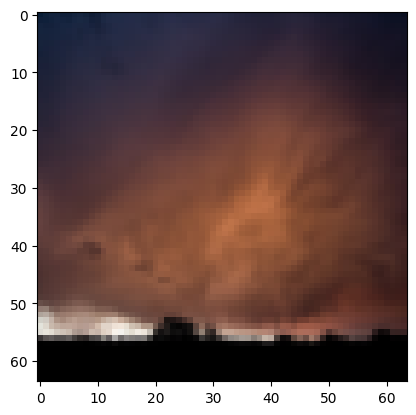

In [27]:
plt.imshow(xtrain[208])

In [28]:
# ORGANIZACION DE LAS MATRICES DE LOS DATOS (Imagenes)
# DEFINICION DE LOS DATOS DE TEST Y ENTRENAMIENTO
xtrain_ = np.reshape(xtrain,(209, 64*64*3))/255

xtest_  = np.reshape(xtest,(50, 64*64*3))/255

## CONSTRUCCIÓN DEL FORWARD PASS Y BACKWARD PASS

In [29]:
# FORWARD PASSS

#GENERALIZACION

#Construcción de la clase para las capas

class layer_nn():
  # Función de actualización para cada neurona
  def __init__(self, func_act, nn_present, nn_before):
    np.random.seed(0)
    # Asignamiento del valor de theta al atributo de la función modelo o ajuste lineal
    self.theta = 2*np.random.random((nn_present, nn_before)) - 1
    # Asignamiento del valor de b al atributo del baias
    self.b = 2*np.random.random((nn_present, 1))-1
    # Asignamiento del valor al atributo de la función de activación
    self.func_acti = func_act


  # Función de valores de salidad de cada capa
  def output(self, A, Ap, Z):
    self.A = A
    self.Z = Z
    self.Ap = Ap
  # Función de valores de la derivada para el gradiente descendente
  def derivative(self,dtheta, db ):
    self.dtheta = dw
    self.db = db

# Función de activación
def activation_function(name, x):

  if (name=="sigmoid"): # REGRESION  LOGISITCA
    f = lambda x: 1/(1+np.exp(-x))
    return f(x), f(x)

  elif (name=="tanh"): # HIPERBOLICA
    f =  lambda x: np.tanh(x)
    return f(x)
  else :
    return "Error"


In [30]:
#FUNCIÓN DE CREACION DE LAS CAPAS
def build_red(Topology, act_func):
  L = len(Topology)
  red_nn=[] # LISTA DE LAS CAPAS
  for i in range(1, L):
    li = layer_nn(act_func[i], Topology[i], Topology[i-1] )
    red_nn.append(li)
  return red_nn

In [31]:
#  FORWARD PASS
def forward_pass(A0, nn):
  update_nn = [] # LISTA DE NEURONAS ACTUALIZADAS
  for layer in nn:
    print(np.shape(layer.theta))
    li = layer # CAPA L-ESIMA
    Zi = li.theta@A0 + li.b # NEURONA L-ESIMA
    Aii, Ap = activation_function(li.func_acti, Zi) # DEFINICION DE FUNCION DE ACTIVACION
    li.output(Aii, Ap,Zi) # DATOS DE SALIDA
    update_nn.append(li) # ACTUALIZACION DE LA NEURONA
    A0 = Aii.copy() # ACTUALIZACION DE FUNCION DE ACTIVACION

  return Aii, update_nn

In [32]:
# DATOS
A0=xtrain_.T
nx = 12288
Topology = [nx,3, 4, 7, 1 ]
act_func = ["sigmoid","sigmoid", "sigmoid", "sigmoid", "sigmoid"]
nn = build_red(Topology, act_func)
AL, update_nn = forward_pass(A0, nn)

(3, 12288)
(4, 3)
(7, 4)
(1, 7)


##GENERALIZACION DEL BACKWARD PASS


In [33]:
# FUNCION DE COSTE
Y=np.array(train_label)
def cost_func(Y, A):
  m = Y.shape[0]
  ji = - ( Y*np.log(A)-(1-Y)*np.log(1-A))
  cost = ji.sum()
  return cost/m
J = cost_func(Y, AL)

In [34]:
#Generalizacion
m_= 1/209
dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
for i in range(len(update_nn)-1, 0, -1):
  fp=update_nn[i].Ap
  dZ = dAL*fp
  dthetaL = dZ@update_nn[i-1].A.T
  db_L=  m_*np.sum(dZ, axis=1, keepdims=True)
  update_nn[i].dtheta=dthetaL
  update_nn[i].db=db_L

In [35]:
# Generalización de las capas
def back_pass(Y, AL, update_nn  ):
  m_= 1/209
  dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
  for i in range(len(update_nn)-1, 0, -1):
    fp=update_nn[i].Ap
    dZ = dAL*fp
    dthetaL = m_*dZ@update_nn[i-1].Ap.T
    db_L=  dZ.mean(axis=1, keepdims=True)
    update_nn[i].dtheta=dthetaL
    update_nn[i].db=db_L
    dAL=np.dot(update_nn[i].theta.T, dZ)
  return update_nn

In [36]:
Y=np.array(train_label)
update_nn = back_pass(Y, AL, update_nn)

## ATTEMPS


In [37]:
class layer_nn():
  def __init__(self, act_fun, nlayer_present, nlayer_before):
    #VALORES DE FUNCIÓN MODELO
    self.theta = 2*np.random.random((nlayer_present, nlayer_before)) - 1
    #BAIAS
    self.B = 2*np.random.random((nlayer_present,1)) - 1
    #FUNCIÓN DE ACTIVACIÓN
    self.act_fun = act_fun

  def output(self, Z, A):
    self.Z = Z
    self.A = A

# FUNCIONES DE ACTIVACIONES
def act_function(x, activation):
  if activation=="sigmoid":
    f = lambda x: 1/(1+np.exp(-x))
    return f(x)

  elif activation == "tanh":
    f = lambda x: np.tanh(x)
    return f(x)
  else :
    return 0

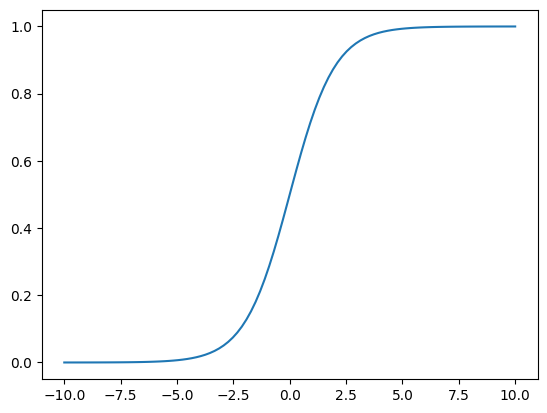

In [38]:
  x = np.linspace(-10, 10, 100)
  plt.plot(x, act_function(x,"sigmoid"))

In [39]:
#Valores de entrada
nx = 12288
# Topologia: Numero de capas con su numero de neuronas respectivas
Topology = [nx,3, 4, 7, 1 ]

In [40]:
# Capas ocultas
# Primera capa con valores de entrada y con su numero de neuronas
l1 = layer_nn("sigmoid",3, nx)
# Segunda capa con valores de la primera capa y su numero de neuronas ...
l2 = layer_nn("sigmoid", 4, 3)
l3 = layer_nn("sigmoid", 7, 4)
l4 = layer_nn("sigmoid",1, 7)

In [41]:
# Inicialización de la arquitectura
nn_red = [l1,l2,l3,l4]

In [42]:
# Valores de entrenamiento
A0=xtrain_.T

In [43]:
# Capas
A=[0]*len(nn_red)
Z=[0]*len(nn_red)
for i in range(len(nn_red)):
  Z[i]=nn_red[i].theta@A0 + nn_red[i].B
  A[i]=act_function(Z[i],nn_red[i].act_fun)
  A0=A[i]

# CAPAS
def forward_pass(A0, nn):
  update_nn = []
  for layer in nn:
    print(np.shape(layer.theta))
    li = layer
    Zi = li.theta@A0 + li.b
    Aii, Ap = activation_function(li.func_acti, Zi)
    li.output(Aii, Ap,Zi)
    update_nn.append(li)
    A0 = Aii.copy()

  return Aii, update_nn

In [44]:
#Generalización de la clase
class layer_nn():
  def __init__(self, func_act, nn_present, nn_before):
    np.random.seed(0)
    self.theta = 2*np.random.random((nn_present, nn_before)) - 1
    self.b = 2*np.random.random((nn_present, 1))-1
    self.func_acti = func_act

  def output(self, A, Ap, Z):
    self.A = A
    self.Z = Z
    self.Ap = Ap

  def derivative(self,dtheta, db ):
    self.dtheta = dw
    self.db = db

def activation_function(name, x):
  if (name=="sigmoid"):
    f = lambda x: 1/(1+np.exp(-x))
    return f(x), f(x)

  elif (name=="tanh"):
    f =  lambda x: np.tanh(x)
    return f(x)
  else :
    return "Error"

In [45]:
def build_red(Topology, act_func):
  L = len(Topology)
  red_nn=[]
  for i in range(1, L):
    li = layer_nn(act_func[i], Topology[i], Topology[i-1] )
    red_nn.append(li)
  return red_nn

In [46]:
# CAPAS
def forward_pass(A0, nn):
  update_nn = []
  for layer in nn:
    print(np.shape(layer.theta))
    li = layer
    Zi = li.theta@A0 + li.b
    Aii, Ap = activation_function(li.func_acti, Zi)
    li.output(Aii, Ap,Zi)
    update_nn.append(li)
    A0 = Aii.copy()

  return Aii, update_nn

In [47]:
#Datos
nx = 12288
Topology = [nx,3, 4, 7, 1 ]
act_func = ["sigmoid","sigmoid", "sigmoid", "sigmoid", "sigmoid"]
nn = build_red(Topology, act_func)